In [1]:
%matplotlib widget

In [2]:
# initialization
from rayoptics.environment import *

In [3]:
root_pth = Path(rayoptics.__file__).resolve().parent

# Create a new model

In [4]:
opm = open_model(root_pth/"codev/tests/threemir.seq")
sm  = opm['seq_model']
osp = opm['optical_spec']
pm = opm['parax_model']
em = opm['ele_model']
pt = opm['part_tree']
ar = opm['analysis_results']
print(f"{opm.ro_version=}")

opm.ro_version='0.9.5'


In [5]:
sm.list_model()

              r            t        medium     mode   zdr      sd
  Obj:     0.000000  1.00000e+11       air             1      1.0000
    1:     0.000000      300.000       air             1      1.0000
    2: -1058.989370     -276.007       air    reflect -1      109.11
 Stop:     0.000000    -0.981318       air            -1      1.0000
    4:  -324.065000      319.161       air    reflect  1      35.059
    5:  -453.965160     -321.621       air    reflect -1      93.366
  Img:     0.000000      0.00000                      -1      1.0000


In [6]:
sm.list_sg()

               r               mode              type          y       alpha
                       t           medium
  Obj:      0.00000                 
                 1.00000e+11          air
    1:      0.00000                 
                     300.000          air
    2:     -1058.99          reflect     dec and return     48.695     8.4386
                    -276.007          air
 Stop:      0.00000                      dec and return     11.445     10.220
                   -0.981318          air
    4:     -324.065          reflect     dec and return     17.562     9.6616
                     319.161          air
    5:     -453.965          reflect     dec and return     67.501     9.5144
                    -321.621          air
  Img:      0.00000                            decenter    -47.681     8.7170


In [7]:
listobj(sm)

0: Obj: dummy
profile: Spherical
c=0.0,   r=0.0
surface_od=1.0
t=100000000000.0 (+1);    medium: air

1: transmit
profile: Spherical
c=0.0,   r=0.0
surface_od=1.0
t=300.0 (+1);    medium: air

2: reflect
profile: Conic
c=-0.0009442965419001326,   r=-1058.98937   conic cnst=-1.314566
decenter type: dec and return
decenter: [ 0.       48.695345  0.      ]
euler angles: [8.438645 0.       0.      ]
surface_od=109.10544356805471
ca: Rectangular: x_half_width=75.734236   y_half_width=78.538674
t=-276.006853 (-1);    medium: air

3 (stop): transmit
profile: Spherical
c=0.0,   r=0.0
decenter type: dec and return
decenter: [ 0.       11.444717  0.      ]
euler angles: [10.2199  0.      0.    ]
surface_od=1.0
t=-0.981318 (-1);    medium: air

4: reflect
profile: Conic
c=-0.0030858006881335533,   r=-324.065   conic cnst=0.889123
decenter type: dec and return
decenter: [ 0.       17.561821  0.      ]
euler angles: [9.66158 0.      0.     ]
surface_od=35.05891852946571
ca: Rectangular: x_half_widt

In [8]:
listobj(osp)

aperture: object epd; value=100.0
field: object angle; value=2.8284271247461903
is_relative=False, is_wide_angle=False
y=2.0 vly= 0.000 vuy= 0.000 vlx= 0.000 vux= 0.000
x,y=0.0 vlx= 0.000 vux= 0.000 vly= 0.000 vuy= 0.000
y=-2.0 vly= 0.000 vuy= 0.000 vlx= 0.000 vux= 0.000
x=2.0, y=-2.0 vlx= 0.000 vux= 0.000 vly= 0.000 vuy= 0.000
x=2.0, y=2.0 vlx= 0.000 vux= 0.000 vly= 0.000 vuy= 0.000
central wavelength=  500.0000 nm
wavelength (weight) =  500.0000 (1.000)*
focus shift=15.407921



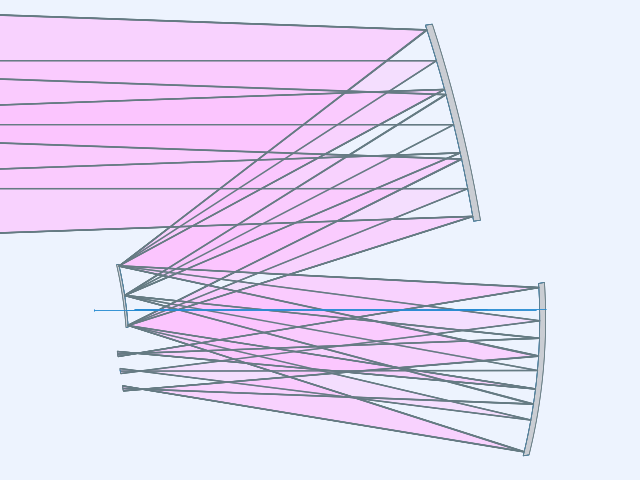

In [9]:
layout_plt = plt.figure(FigureClass=InteractiveLayout, opt_model=opm,
                        do_draw_rays=True, do_paraxial_layout=False).plot()

In [10]:
sm.list_lcl_tfrms()

 0:    1.000000    0.000000    0.000000       0.00000
       0.000000    1.000000    0.000000       0.00000
       0.000000    0.000000    1.000000  100000000000.00000

 1:    1.000000    0.000000    0.000000       0.00000
       0.000000    0.989174   -0.146750      48.69535
      -0.000000    0.146750    0.989174     300.00000

 2:    1.000000    0.000000    0.000000       0.00000
       0.000000    0.999517   -0.031084       3.65674
       0.000000    0.031084    0.999517    -278.48522

 3:    1.000000    0.000000    0.000000       0.00000
       0.000000    0.999953    0.009744       6.19416
       0.000000   -0.009744    0.999953       0.11959

 4:    1.000000    0.000000    0.000000       0.00000
       0.000000    0.999997    0.002568      -4.33380
       0.000000   -0.002568    0.999997     323.01479

 5:    1.000000    0.000000    0.000000       0.00000
       0.000000    0.999903    0.013918     -60.43484
       0.000000   -0.013918    0.999903    -336.23590

 6:    1.000000 

In [11]:
sm.list_gbl_tfrms()

 0:    1.000000    0.000000    0.000000       0.00000
       0.000000    1.000000    0.000000       0.00000
       0.000000    0.000000    1.000000  -100000000000.00000

 1:    1.000000    0.000000    0.000000       0.00000
       0.000000    1.000000    0.000000       0.00000
       0.000000    0.000000    1.000000       0.00000

 2:    1.000000    0.000000    0.000000       0.00000
       0.000000    0.989174    0.146750      48.69535
       0.000000   -0.146750    0.989174     300.00000

 3:    1.000000    0.000000    0.000000       0.00000
       0.000000    0.984134    0.177427      11.44472
       0.000000   -0.177427    0.984134      23.99315

 4:    1.000000    0.000000    0.000000       0.00000
       0.000000    0.985816    0.167828      17.56182
       0.000000   -0.167828    0.985816      23.01183

 5:    1.000000    0.000000    0.000000       0.00000
       0.000000    0.986244    0.165296      67.50053
       0.000000   -0.165296    0.986244     342.17239

 6:    1.000000

In [12]:
for i,trfm in enumerate(sm.gbl_tfrms):
    print("{}: {:12.7g} {:12.7g} {:12.7g}".format(i, trfm[1][0], trfm[1][1], trfm[1][2]))

0:            0            0       -1e+11
1:            0            0            0
2:            0     48.69535          300
3:            0     11.44472     23.99315
4:            0     17.56182     23.01183
5:            0     67.50053     342.1724
6:            0    -47.68134     20.55136


In [13]:
for i,ifc in enumerate(sm.ifcs):
    if ifc.decenter is not None:
        dec = ifc.decenter.dec
        print("{}: {:12.7g} {:12.7g} {:12.7g}".format(i, dec[0], dec[1], dec[2]))

2:            0     48.69535            0
3:            0     11.44472            0
4:            0     17.56182            0
5:            0     67.50053            0
6:            0    -47.68134            0


In [14]:
pt0 = np.array([0., 10., 0.])
dir0 = np.array([0., 0., 1.])
wvl = sm.central_wavelength()
cr0 = rt.trace(sm, pt0, dir0, wvl)
list_ray(cr0[0])

            X            Y            Z           L            M            N               Len
  0:      0.00000     10.00000            0     0.000000     0.000000     1.000000        1e+11
  1:      0.00000     10.00000            0     0.000000     0.000000     1.000000       305.01
  2:      0.00000    -39.01227     -0.71851     0.000000    -0.073586    -0.997289       276.56
  3:      0.00000    -63.05024            0     0.000000    -0.042551    -0.999094       8.2271
  4:      0.00000    -69.67243      -7.6607     0.000000    -0.475052     0.879958       313.21
  5:      0.00000   -214.27020      -54.514     0.000000     0.493900    -0.869519        323.9
  6:      0.00000      6.13888            0     0.000000     0.481750    -0.876308            0


In [15]:
sm.stop_surface

3

In [16]:
s5=sm.ifcs[5]

In [17]:
fld, wvl, foc = osp.lookup_fld_wvl_focus(1)

In [18]:
oa_ray = trace_base(opm, [0., 0.], fld, wvl)

In [19]:
list_ray(oa_ray)

            X            Y            Z           L            M            N               Len
  0:      0.00000      0.00000            0     0.000000     0.000000     1.000000        1e+11
  1:      0.00000    144.92753            0     0.000000     0.000000     1.000000       281.15
  2:      0.00000     97.95712      -4.5275     0.000000    -0.325473    -0.945551       289.73
  3:      0.00000      0.00000            0     0.000000    -0.295924    -0.955211  -7.4781e-08
  4:      0.00000     -6.19503    -0.059224     0.000000    -0.341403     0.939917       327.93
  5:      0.00000   -113.85435      -14.558     0.000000     0.163748    -0.986502       326.08
  6:      0.00000     -0.02444            0     0.000000     0.150002    -0.988686            0


In [20]:
list_ray(oa_ray, tfrms=sm.gbl_tfrms)

            X            Y            Z           L            M            N               Len
  0:      0.00000      0.00000       -1e+11     0.000000     0.000000     1.000000        1e+11
  1:      0.00000    144.92753            0     0.000000     0.000000     1.000000       281.15
  2:      0.00000    144.92753       281.15     0.000000    -0.460709    -0.887551       289.73
  3:      0.00000     11.44472       23.993     0.000000    -0.460709    -0.887551  -7.4781e-08
  4:      0.00000     11.44472       23.993     0.000000    -0.178816     0.983882       327.93
  5:      0.00000    -47.19394       346.63     0.000000    -0.001569    -0.999999       326.08
  6:      0.00000    -47.70550       20.555     0.000000    -0.001569    -0.999999            0


In [21]:
s5.clear_apertures[0].bounding_box()

(array([ -66.581268, -177.807751]), array([ 66.581268, -46.900709]))

In [22]:
vars(s5.clear_apertures[0])

{'x_offset': 0.0,
 'y_offset': -112.35423,
 'rotation': 0.0,
 'x_half_width': 66.581268,
 'y_half_width': 65.453521}

In [23]:
listobj(s5.decenter)

decenter type: dec and return
decenter: [ 0.       67.500535  0.      ]
euler angles: [9.514418 0.       0.      ]



In [24]:
si=sm.ifcs[-1]

In [25]:
vars(si.decenter)

{'_dtype': 'decenter',
 'dec': array([  0.      , -47.681342,   0.      ]),
 'euler': array([8.716957, 0.      , 0.      ]),
 'rot_pt': array([0., 0., 0.]),
 'rot_mat': array([[ 1.        ,  0.        , -0.        ],
        [ 0.        ,  0.98844908,  0.15155336],
        [ 0.        , -0.15155336,  0.98844908]])}

In [27]:
oar_result = trace_ray(opm, [0,0], osp['fov'].fields[0], osp['wvls'].central_wvl)
oar, oar_err = oar_result

In [28]:
before_dir = oar.ray[0].d
print(f"{0:2d}:                                   |"
      f"{before_dir[0]:10.6f} {before_dir[1]:10.6f} {before_dir[2]:10.6f}")
for i, rst in enumerate(zip(oar.ray[1:-1], sm.lcl_tfrms), start=1):
    seg, tfrm = rst
    after_dir = seg.d
    rt, t = tfrm
    b4_dir = rt.dot(before_dir)
    print(f"{i:2d}: {b4_dir[0]:10.6f} {b4_dir[1]:10.6f} {b4_dir[2]:10.6f}  |"
          f"{after_dir[0]:10.6f} {after_dir[1]:10.6f} {after_dir[2]:10.6f}")
    before_dir = after_dir

rt, t = sm.lcl_tfrms[-1]
b4_dir = rt.dot(before_dir)
print(f"{i+1:2d}: {b4_dir[0]:10.6f} {b4_dir[1]:10.6f} {b4_dir[2]:10.6f}  |")


 0:                                   |  0.000000   0.034899   0.999391
 1:   0.000000   0.034899   0.999391  |  0.000000   0.034899   0.999391
 2:   0.000000  -0.112139   0.993693  |  0.000000  -0.251614  -0.967828
 3:   0.000000  -0.221409  -0.975181  |  0.000000  -0.221409  -0.975181
 4:   0.000000  -0.230901  -0.972977  |  0.000000  -0.267932   0.963438
 5:   0.000000  -0.265456   0.964123  |  0.000000   0.128091  -0.991762
 6:   0.000000   0.128091  -0.991762  |


In [29]:
list_ray(oar)

            X            Y            Z           L            M            N               Len
  0:      0.00000 -3492076979.78399            0     0.000000     0.034899     0.999391   1.0006e+11
  1:      0.00000    112.84874            0     0.000000     0.034899     0.999391       286.46
  2:      0.00000     75.36007      -2.6803     0.000000    -0.251614    -0.967828       284.97
  3:      0.00000     -0.00000            0     0.000000    -0.221409    -0.975181  -6.9849e-08
  4:      0.00000     -6.19503    -0.059224     0.000000    -0.267932     0.963438       325.89
  5:      0.00000    -89.20121      -8.8676     0.000000     0.128091    -0.991762        329.9
  6:      0.00000     13.49184            0     0.000000     0.114275    -0.993449            0


In [30]:
sm.list_lcl_tfrms()

 0:    1.000000    0.000000    0.000000       0.00000
       0.000000    1.000000    0.000000       0.00000
       0.000000    0.000000    1.000000  100000000000.00000

 1:    1.000000    0.000000    0.000000       0.00000
       0.000000    0.989174   -0.146750      48.69535
      -0.000000    0.146750    0.989174     300.00000

 2:    1.000000    0.000000    0.000000       0.00000
       0.000000    0.999517   -0.031084       3.65674
       0.000000    0.031084    0.999517    -278.48522

 3:    1.000000    0.000000    0.000000       0.00000
       0.000000    0.999953    0.009744       6.19416
       0.000000   -0.009744    0.999953       0.11959

 4:    1.000000    0.000000    0.000000       0.00000
       0.000000    0.999997    0.002568      -4.33380
       0.000000   -0.002568    0.999997     323.01479

 5:    1.000000    0.000000    0.000000       0.00000
       0.000000    0.999903    0.013918     -60.43484
       0.000000   -0.013918    0.999903    -336.23590

 6:    1.000000 

In [31]:
for i, ifc in enumerate(sm.ifcs):
    if ifc.decenter is not None:
        r = ifc.decenter.rot_mat
        print(f"{i:2d}:  {r[0][0]:10.6f}  {r[0][1]:10.6f}  {r[0][2]:10.6f}")
        print(f"     {r[1][0]:10.6f}  {r[1][1]:10.6f}  {r[1][2]:10.6f}")
        print(f"     {r[2][0]:10.6f}  {r[2][1]:10.6f}  {r[2][2]:10.6f}\n")

 2:    1.000000    0.000000   -0.000000
       0.000000    0.989174    0.146750
       0.000000   -0.146750    0.989174

 3:    1.000000    0.000000   -0.000000
       0.000000    0.984134    0.177427
       0.000000   -0.177427    0.984134

 4:    1.000000    0.000000   -0.000000
       0.000000    0.985816    0.167828
       0.000000   -0.167828    0.985816

 5:    1.000000    0.000000   -0.000000
       0.000000    0.986244    0.165296
       0.000000   -0.165296    0.986244

 6:    1.000000    0.000000   -0.000000
       0.000000    0.988449    0.151553
       0.000000   -0.151553    0.988449

